<a href="https://colab.research.google.com/github/Sewanmpm/IAAC2024_tutorials/blob/main/Germany_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [11]:
!pip install osmnx geopy scikit-learn

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np


sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
# to know the correct format we either guess or we go on the OSM website click on a point on their map to find out what it's called

In [ ]:
# right click anywhere >> query function

In [20]:
PLACE_NAME = "San Paolo, Italy"
graph = osmnx.graph_from_place(PLACE_NAME)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


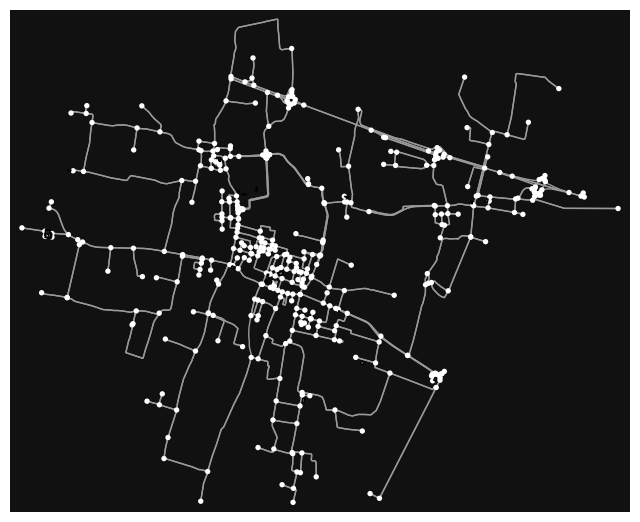

In [24]:
import osmnx as ox

In [35]:
from shapely.geometry import Polygon


In [46]:
polygon_coords =[
    (10.17455, 49.3801),  # Top-left (Northwest)
    (10.18396, 49.38007),  # Top-right (Northeast)
    (10.18393, 49.37464),  # Bottom-right (Southeast)
    (10.17451, 49.37468)   # Bottom-left (Southwest)
]
polygon = Polygon(polygon_coords)

# Fetch the graph from OpenStreetMap within the polygon
graph = ox.graph_from_polygon(polygon, network_type='all')

# Define the tags to filter for the geometries you want to retrieve
tags = {'building': True}

# Fetch the building footprints within the polygon
gdf = ox.features_from_polygon(polygon, tags)


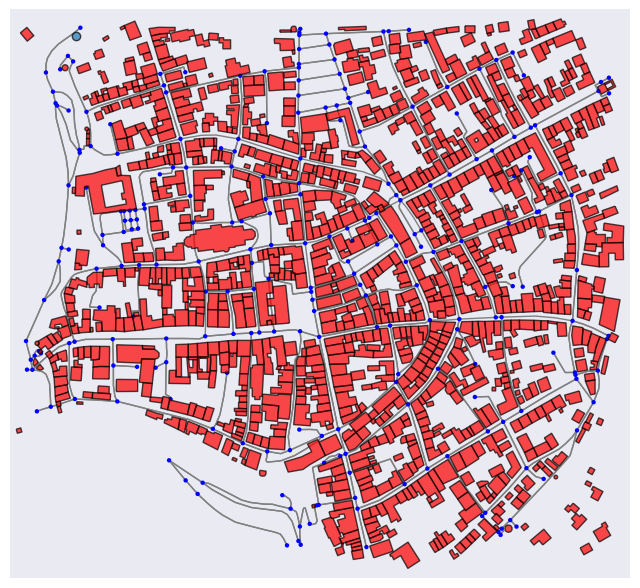

In [47]:
# Plot the graph
fig, ax = plt.subplots(figsize=(8, 8))
ox.plot_graph(graph, ax=ax, show=False, close=False, node_color="blue", node_size=10, edge_color="gray", edge_linewidth=1)

# Check if buildings were retrieved
if not gdf.empty:
    # Plot the building footprints with enhanced visibility
    gdf.plot(ax=ax, facecolor="red", edgecolor="black", alpha=0.7)
else:
    print("No buildings found for the specified location.")

# Set a more focused plot area by adjusting the x and y limits
margin = 0.0001  # Margin around the area
x_min, y_min, x_max, y_max = gdf.total_bounds
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)

plt.show()


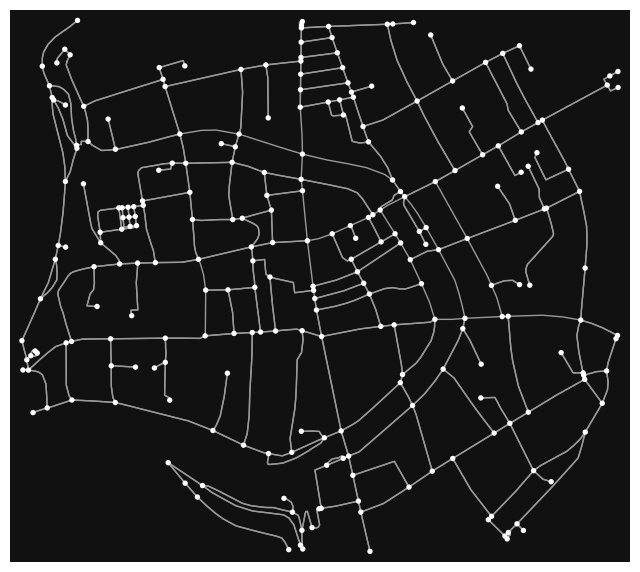

In [48]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [50]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-50-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


nodes  \
element_type osmid                                                          
way          140466408  [525670225, 492433599, 3137295709, 1538896005,...   
             141331646  [1547184363, 1547184368, 1547184377, 154718439...   

                                       addr:city addr:country  \
element_type osmid                                              
way          140466408  Rothenburg ob der Tauber           DE   
             141331646  Rothenburg ob der Tauber           DE   

                       addr:housenumber addr:postcode addr:street    building  \
element_type osmid                                                              
way          140466408                1         91541  Marktplatz  government   
             141331646                2         91541  Marktplatz  government   

                       building:architecture heritage heritage:operator  ...  \
element_type osmid                                                       ...   
way          140466408           renaissance        4              BLfD  ...   
             141331646                   NaN        4              BLfD  ...   

                                source   wikidata  \
element_type osmid                                  
way          140466408  bing;estimated  Q41424928   
             141331646  bing;estimated        NaN   

                                                  wikipedia  \
element_type osmid                                            
way          140466408  de:Rathaus Rothenburg ob der Tauber   
             141331646                                  NaN   

                                                                 geometry  \
element_type osmid                                                          
way          140466408  POLYGON ((10.17881 49.37702, 10.17868 49.37701...   
             141331646  POLYGON ((10.17893 49.37738, 10.17892 49.37742...   

                        addr:housename building:levels historic    name:zh  \
element_type osmid                                                           
way          140466408             NaN             NaN      NaN        NaN   
             141331646  Ratstrinkstube               2      yes  羅騰堡市議會宴會館   

                       roof:levels start_date  
element_type osmid                             
way          140466408         NaN        NaN  
             141331646           3       1466  

[2 rows x 25 columns]

In [ ]:
# sometimes the buildings are just a point like "node" above instead of it being a contour (polygon) which would create empty spots in our plot

<Axes: >

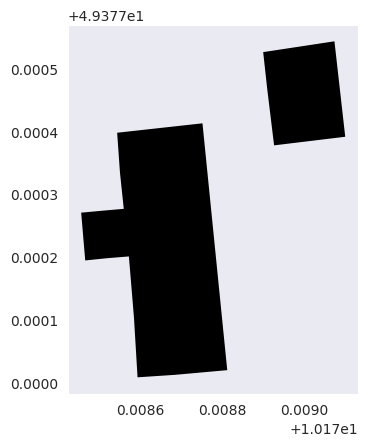

In [51]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [45]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
restaurants.head()

<ipython-input-45-995886824f10>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = osmnx.geometries_from_place(


InsufficientResponseError: No data elements in server response. Check log and query location/tags.

### 🎢 Putting it all together in one map

In [ ]:
# these random blue dots showed up
# to figure out why, she removed each line of code separately to find out which line of code is giving the error
# so she found out it's the buildings that are defined as a point (node) above
# facecolor for polygons
# color is for dots
# edgecolor is for edges (streets)

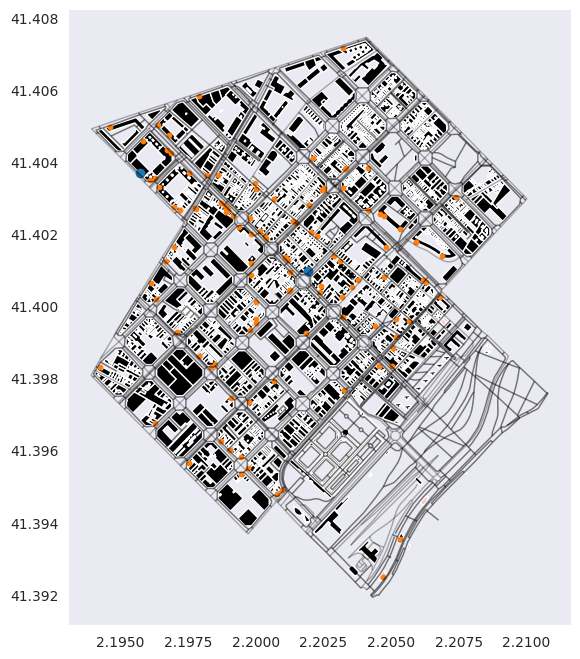

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

In [ ]:
# we're adding a red dot on the map

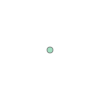

In [ ]:
coords = (2.2011003,41.3989949)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.2011003 41.3989949


In [ ]:
# we make sure the crs of the point takes the same crs of the map

In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

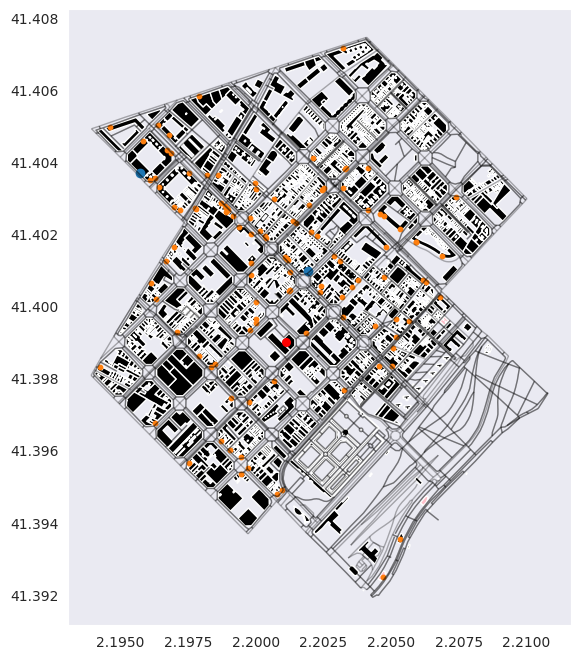

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
# if a place is in their library then we can extract it specifically

In [ ]:
our_place = "Casino l'Aliança del Poblenou"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.20336 41.39986)  Casino l'Aliança del Poblenou, Rambla del Pobl...

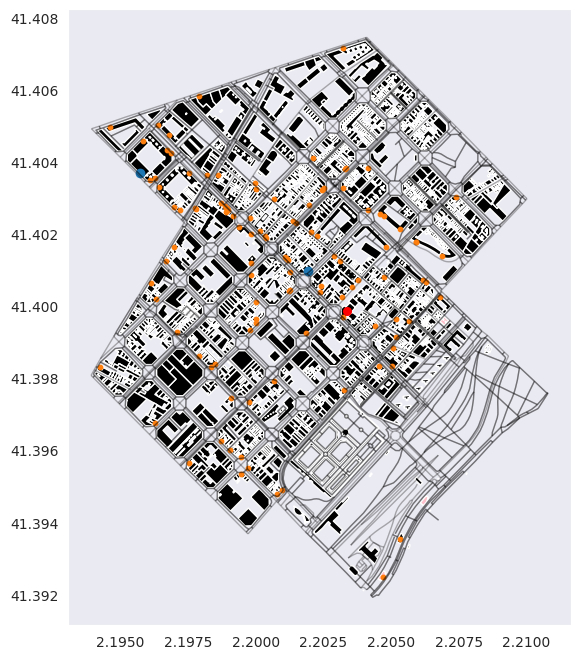

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

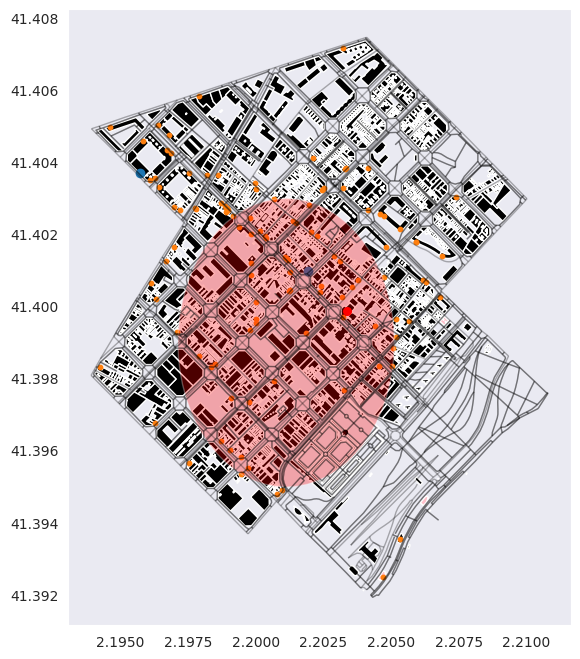

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
# defining which restaurants we will consider as "accessible"

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

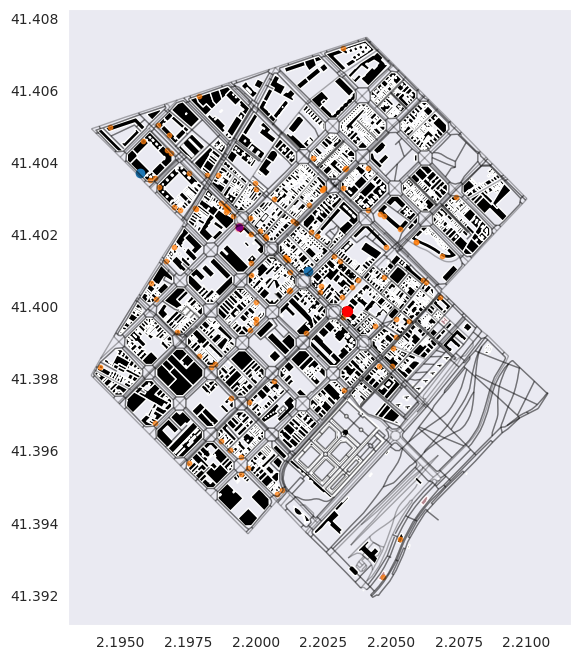

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

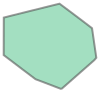

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1907,
 'm': 5413,
 'k_avg': 5.67697954902989,
 'edge_length_total': 160919.76599999916,
 'edge_length_avg': 29.728388324404058,
 'streets_per_node_avg': 3.40534871525957,
 'streets_per_node_counts': {0: 0, 1: 44, 2: 2, 3: 1009, 4: 841, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.023072889355007866,
  2: 0.001048767697954903,
  3: 0.5291033036182485,
  4: 0.4410068169900367,
  5: 0.0057682223387519665},
 'intersection_count': 1863,
 'street_length_total': 95690.108,
 'street_segment_count': 3176,
 'street_length_avg': 30.129127204030226,
 'circuity_avg': 1.030140938475798,
 'self_loop_proportion': 0.001889168765743073,
 'node_density_km': 10249958297341.55,
 'intersection_density_km': 10013462143653.543,
 'edge_density_km': 864929675258496.1,
 'street_density_km': 514325965636134.75}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
# we define both points and then use shortest distance

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

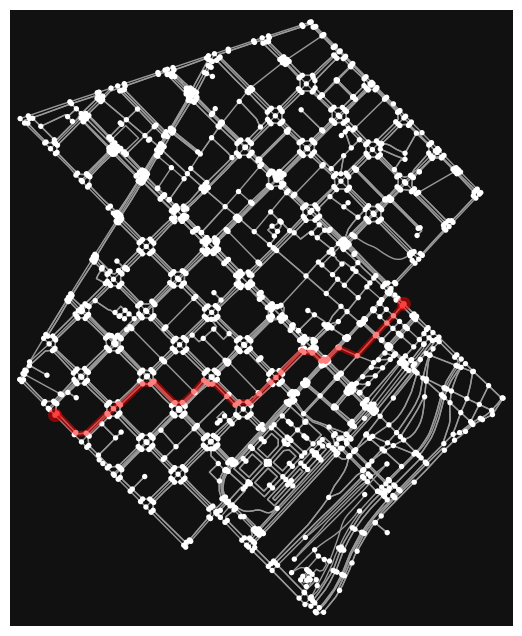

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/tmp/ipykernel_2205/3375068879.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.01473
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

In [ ]:
# we can't calculate it from any point (like the iaac node we added) we have to check what's the nearest node on the OMNx network and we calculate from that

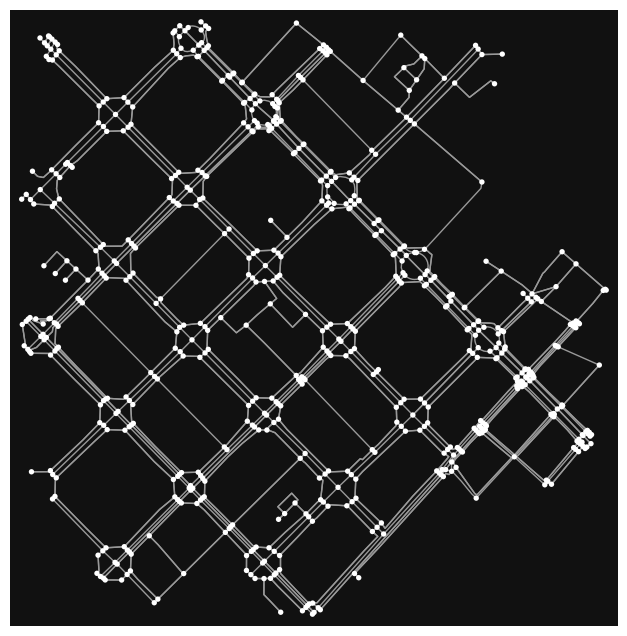

In [ ]:
# getting iaac node from the graph: (the node we wanna calculate distances from)
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only: (we cut the graph according where we can walk)
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


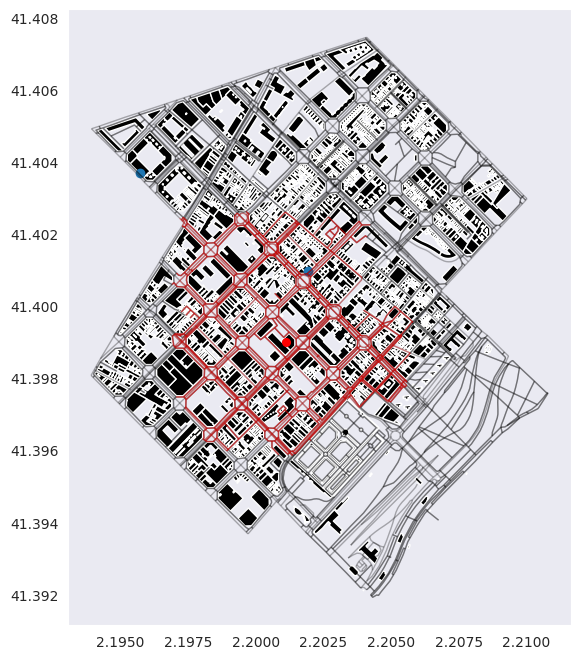

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

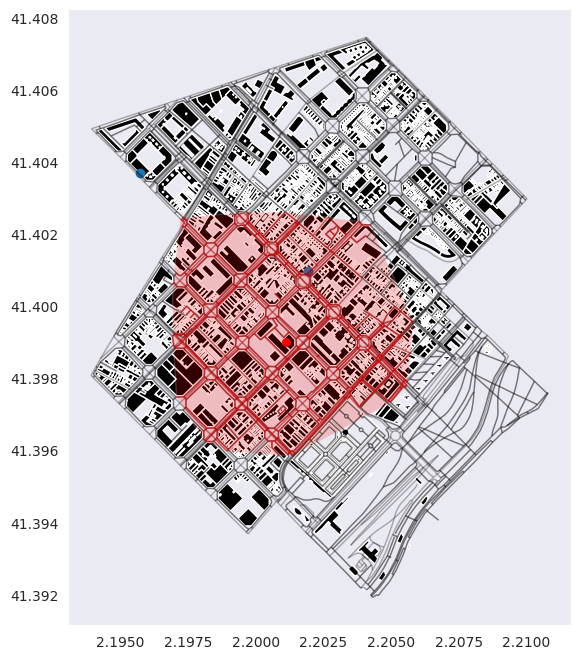

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.